**El algoritmo A y su solución es tomado del bootcamp de Inteligencia Artificial de la Universidad Sergio Arboleda**

**Algoritmo A***

El algoritmo A* es una técnica de búsqueda informada utilizada comúnmente en inteligencia artificial y ciencias de la computación para encontrar el camino más corto o la ruta óptima entre un nodo de inicio y un nodo de destino en un grafo ponderado. A* es una extensión del algoritmo de búsqueda de costo uniforme, que equilibra eficazmente la exhaustividad y la eficiencia al considerar tanto el costo actual para llegar a un nodo como una estimación del costo restante para llegar al objetivo.

El funcionamiento del algoritmo A* se basa en el uso de una función de evaluación que calcula una puntuación para cada nodo en el grafo, combinando el costo acumulado desde el nodo inicial con una estimación heurística del costo restante hasta el nodo objetivo. Esta función de evaluación guía al algoritmo para explorar primero las rutas que parecen más prometedoras en términos de eficiencia y luego ajustar su enfoque a medida que obtiene más información sobre el entorno de búsqueda.

El algoritmo A* utiliza una estructura de datos conocida como "lista abierta" para mantener un registro de los nodos que aún no se han explorado pero que se consideran candidatos prometedores para la expansión. En cada iteración, el algoritmo selecciona el nodo con la puntuación más baja de la lista abierta y lo expande, considerando sus nodos vecinos y actualizando sus puntuaciones según sea necesario. Este proceso continúa hasta que se alcanza el nodo objetivo o se agota la lista abierta sin encontrar una solución.

La eficacia del algoritmo A* depende en gran medida de la elección de una heurística adecuada que proporcione estimaciones precisas del costo restante hasta el objetivo. Una heurística admisible es aquella que nunca sobreestima el costo real, lo que garantiza que el algoritmo encuentre siempre la solución óptima si existe. Sin embargo, las heurísticas no admisibles pueden conducir a soluciones subóptimas o incluso a un comportamiento incorrecto del algoritmo en algunos casos.

En resumen, el algoritmo A* es una herramienta poderosa y versátil que se utiliza en una amplia variedad de aplicaciones, desde sistemas de navegación hasta planificación de rutas y resolución de problemas en juegos. Al combinar la eficiencia de la búsqueda de costo uniforme con la guía heurística, A* ofrece una solución efectiva para problemas de búsqueda en grafos con información parcial sobre el entorno de búsqueda.

In [ ]:
import heapq

class Nodo:
    def __init__(self, nombre, x, y):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.vecinos = []
        self.g = float('inf')
        self.h = 0
        self.f = 0
        self.padre = None

    def __lt__(self, otro):
        return self.f < otro.f

class Grafo:
    def __init__(self):
        self.nodos = {}

    def agregar_nodo(self, nodo):
        self.nodos[nodo.nombre] = nodo

    def agregar_arista(self, inicio, fin, costo):
        self.nodos[inicio].vecinos.append((self.nodos[fin], costo))

    def a_estrella(self, inicio_nombre, fin_nombre):
        if inicio_nombre not in self.nodos or fin_nombre not in self.nodos:
            return None

        inicio = self.nodos[inicio_nombre]
        fin = self.nodos[fin_nombre]

        inicio.g = 0
        inicio.h = self.heuristica(inicio, fin)
        inicio.f = inicio.h

        lista_abierta = [inicio]
        heapq.heapify(lista_abierta)

        while lista_abierta:
            actual = heapq.heappop(lista_abierta)

            if actual == fin:
                camino = []
                while actual:
                    camino.append(actual.nombre)
                    actual = actual.padre
                return camino[::-1]

            for vecino, costo in actual.vecinos:
                nuevo_g = actual.g + costo
                if nuevo_g < vecino.g:
                    vecino.padre = actual
                    vecino.g = nuevo_g
                    vecino.h = self.heuristica(vecino, fin)
                    vecino.f = vecino.g + vecino.h
                    heapq.heappush(lista_abierta, vecino)

        return None

    def heuristica(self, nodo_a, nodo_b):
        return abs(nodo_a.x - nodo_b.x) + abs(nodo_a.y - nodo_b.y)

# Ejemplo de uso
if __name__ == "__main__":
    grafo = Grafo()

    # Agregar nodos
    grafo.agregar_nodo(Nodo('A', 0, 0))
    grafo.agregar_nodo(Nodo('B', 1, 2))
    grafo.agregar_nodo(Nodo('C', 2, 1))
    grafo.agregar_nodo(Nodo('D', 3, 3))

    # Agregar aristas
    grafo.agregar_arista('A', 'B', 1)
    grafo.agregar_arista('A', 'C', 2)
    grafo.agregar_arista('B', 'D', 3)
    grafo.agregar_arista('C', 'D', 2)

    camino = grafo.a_estrella('A', 'D')
    if camino:
        print("El camino más corto es:", camino)
    else:
        print("No se encontró un camino.")


El camino más corto es: ['A', 'B', 'D']


Esta implementación define dos clases, Nodo y Grafo, para representar los elementos del grafo y realizar el algoritmo A. La función a_estrella es la implementación principal del algoritmo A. En este ejemplo, se crea un grafo simple con cuatro nodos y se encuentra el camino más corto entre dos nodos específicos. La heurística utilizada en este ejemplo es la distancia de Manhattan.

In [ ]:
import heapq

class Nodo:
    def __init__(self, estado, g=0, h=0):
        self.estado = estado
        self.g = g  # Costo real desde el nodo inicial hasta este nodo
        self.h = h  # Costo heurístico desde este nodo hasta el nodo objetivo
        self.f = g + h  # Costo total del camino desde el nodo inicial hasta el objetivo
        self.padre = None # Initialize the padre attribute

    def __lt__(self, otro):
        return self.f < otro.f

class Grafo:
    def __init__(self):
        self.vecinos = {}

    def agregar_arista(self, inicio, fin, costo):
        if inicio not in self.vecinos:
            self.vecinos[inicio] = []
        self.vecinos[inicio].append((fin, costo))

    def a_estrella(self, inicio, objetivo, heuristica):
        lista_abierta = []
        heapq.heappush(lista_abierta, inicio)

        while lista_abierta:
            actual = heapq.heappop(lista_abierta)

            if actual.estado == objetivo:
                camino = []
                while actual:
                    camino.append(actual.estado)
                    actual = actual.padre
                return camino[::-1]

            for vecino, costo in self.vecinos.get(actual.estado, []):
                nuevo_g = actual.g + costo
                nuevo_h = heuristica(vecino, objetivo)
                nuevo_f = nuevo_g + nuevo_h

                sucesor = Nodo(vecino, nuevo_g, nuevo_h)
                sucesor.padre = actual

                heapq.heappush(lista_abierta, sucesor)

        return None

# Función de heurística: distancia Manhattan
def heuristica_manhattan(nodo_actual, objetivo):
    x1, y1 = nodo_actual
    x2, y2 = objetivo
    return abs(x1 - x2) + abs(y1 - y2)

# Ejemplo de uso
if __name__ == "__main__":
    grafo = Grafo()
    grafo.agregar_arista((0, 0), (1, 0), 1)
    grafo.agregar_arista((1, 0), (1, 1), 1)
    grafo.agregar_arista((1, 1), (2, 1), 1)
    grafo.agregar_arista((2, 1), (2, 2), 1)
    grafo.agregar_arista((2, 2), (3, 2), 1)
    grafo.agregar_arista((3, 2), (3, 3), 1)
    grafo.agregar_arista((3, 3), (4, 3), 1)

    inicio = Nodo((0, 0))
    objetivo = (4, 3)

    camino = grafo.a_estrella(inicio, objetivo, heuristica_manhattan)
    if camino:
        print("El camino más corto es:", camino)
    else:
        print("No se encontró un camino.")


El camino más corto es: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3)]


En este ejemplo, tenemos un grafo que representa un laberinto simple. Cada celda del laberinto se representa como un par de coordenadas (x, y). La función heuristica_manhattan calcula la distancia de Manhattan entre dos celdas del laberinto, que se utiliza como heurística en el algoritmo A. El algoritmo A se ejecuta para encontrar el camino más corto desde la celda inicial (0, 0) hasta la celda objetivo (4, 3).

**A continuación, desarrollaremos un ejercicio tomando como referencia el algoritmo A***

**Ejercicio 1:**

**Problema: En un juego de laberinto, un jugador desea encontrar el camino más corto desde la casilla de inicio hasta la casilla de salida.**

El laberinto está representado por una cuadrícula de celdas, donde algunas celdas pueden estar bloqueadas (paredes) y otras son transitables.
Cada celda tiene coordenadas (x, y).
El jugador puede moverse en cuatro direcciones: arriba, abajo, izquierda y derecha.
El costo de moverse de una celda a otra es 1.
El jugador tiene información sobre la posición de la casilla de inicio y la casilla de salida.
El objetivo es encontrar el camino más corto desde la casilla de inicio hasta la casilla de salida, evitando las celdas bloqueadas.
Este problema se puede resolver utilizando el algoritmo A* con una heurística adecuada, como la distancia de Manhattan o la distancia euclidiana entre las celdas. El algoritmo A* encontrará el camino óptimo que minimiza la distancia total recorrida desde la casilla de inicio hasta la casilla de salida, evitando las celdas bloqueadas en el camino.

In [ ]:
import heapq

# Definimos la clase Nodo para almacenar la información de cada celda
"""Cada celda del laberinto se representa como un nodo que almacena sus coordenadas,
el costo acumulado para llegar a ella, la heurística (estimación de la distancia al objetivo)
y un puntero al nodo padre. """
class Nodo:
    def __init__(self, x, y, costo, heuristica, padre=None):
        self.x = x
        self.y = y
        self.costo = costo
        self.heuristica = heuristica
        self.padre = padre

    def __lt__(self, other):
        return (self.costo + self.heuristica) < (other.costo + other.heuristica)

# Función para calcular la heurística (distancia de Manhattan)
"""Calcula la distancia de Manhattan entre dos celdas,
que es la suma de las diferencias absolutas de sus coordenadas. """
def heuristica(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Función para obtener los vecinos de una celda
"""Genera las celdas adyacentes que son transitables (no bloqueadas)
y están dentro de los límites del laberinto. """
def obtener_vecinos(laberinto, nodo):
    vecinos = []
    direcciones = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    for d in direcciones:
        x, y = nodo.x + d[0], nodo.y + d[1]
        if 0 <= x < len(laberinto) and 0 <= y < len(laberinto[0]) and laberinto[x][y] == 0:
            vecinos.append((x, y))
    return vecinos

# Función principal del algoritmo A*
"""Inicializa el nodo de inicio y el nodo de fin.
Usa una lista abierta (open list) para almacenar los nodos que se van a evaluar y una lista cerrada (closed list) para los nodos ya evaluados.
Extrae el nodo con el menor costo total (costo acumulado + heurística) de la lista abierta.
Si el nodo actual es el nodo de fin, reconstruye el camino desde el nodo de fin hasta el nodo de inicio siguiendo los punteros a los nodos padres.
Genera los vecinos del nodo actual y los añade a la lista abierta si no han sido evaluados."""
def a_estrella(laberinto, inicio, fin):
    inicio_nodo = Nodo(inicio[0], inicio[1], 0, heuristica(inicio, fin))
    fin_nodo = Nodo(fin[0], fin[1], 0, 0)
    open_list = []
    closed_list = set()
    heapq.heappush(open_list, inicio_nodo)

    while open_list:
        nodo_actual = heapq.heappop(open_list)
        closed_list.add((nodo_actual.x, nodo_actual.y))

        if (nodo_actual.x, nodo_actual.y) == (fin_nodo.x, fin_nodo.y):
            camino = []
            while nodo_actual:
                camino.append((nodo_actual.x, nodo_actual.y))
                nodo_actual = nodo_actual.padre
            return camino[::-1]

        vecinos = obtener_vecinos(laberinto, nodo_actual)
        for vecino in vecinos:
            if vecino in closed_list:
                continue
            vecino_nodo = Nodo(vecino[0], vecino[1], nodo_actual.costo + 1, heuristica(vecino, fin), nodo_actual)
            heapq.heappush(open_list, vecino_nodo)

    return None

# Ejemplo de uso
"""Define un laberinto, las coordenadas de inicio y fin, y llama a la función a_estrella para encontrar el camino más corto."""
laberinto = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]
inicio = (0, 0)
fin = (4, 4)

camino = a_estrella(laberinto, inicio, fin)
print("Camino encontrado:", camino)
print("Costo total:", len(camino) - 1)

Camino encontrado: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Costo total: 12


**Algoritmo KP**

**Tomado del del bootcamp de Inteligencia Artificial de la Universidad Sergio Arboleda**

In [ ]:

#KP por combinaciones
import itertools
from itertools import product
import time

# Establecer los índices de la matriz de datos
# 0 = nombre, 1 = peso, 2 = valor, 3 = fitness
KNAPSACK_WEIGHT_INDEX = 1
KNAPSACK_VALUE_INDEX = 2
KNAPSACK_FITNESS_INDEX = 3

# Pequeño conjunto de datos
knapsack_items = [
    ['Pearls', 3, 4],
    ['Gold', 7, 7],
    ['Crown', 4, 5],
    ['Coin', 1, 1],
    ['Axe', 5, 4],
    ['Sword', 4, 3],
    ['Ring', 2, 5],
    ['Cup', 3, 1],
]

# Gran conjunto de datos
# knapsack_items = [
#     ['Axe', 32252, 68674],
#     ['Bronze coin', 225790, 471010],
#     ['Crown', 468164, 944620],
#     ['Diamond statue', 489494, 962094],
#     ['Emerald belt', 35384, 78344],
#     ['Fossil', 265590, 579152],
#     ['Gold coin', 497911, 902698],
#     ['Helmet', 800493, 1686515],
#     ['Ink', 823576, 1688691],
#     ['Jewel box', 552202, 1056157],
#     ['Knife', 323618, 677562],
#     ['Long sword', 382846, 833132],
#     ['Mask', 44676, 99192],
#     ['Necklace', 169738, 376418],
#     ['Opal badge', 610876, 1253986],
#     ['Pearls', 854190, 1853562],
#     ['Quiver', 671123, 1320297],
#     ['Ruby ring', 698180, 1301637],
#     ['Silver bracelet', 446517, 859835],
#     ['Timepiece', 909620, 1677534],
#     ['Uniform', 904818, 1910501],
#     ['Venom potion', 730061, 1528646],
#     ['Wool scarf', 931932, 1827477],
#     ['Cross bow', 952360, 2068204],
#     ['Yesteryear book', 926023, 1746556],
#     ['Zinc cup', 978724, 2100851, 0]
# ]


# Obtener todas las combinaciones posibles de elementos. Esto es exhaustivo y computacionalmente caro.
def get_all_combinations(items):
    combinations = []
    for index in range(0, len(items)):
        combinations.append(items[index])
        possibilities = [list(x) for x in itertools.combinations(items, index)]
        combinations.append(possibilities)
    return combinations


# Calcular la aptitud de los elementos seleccionados dado un peso máximo
def calculate_individual_fitness(solution, maximum_weight):
    total_weight = 0
    total_value = 0
    # Obtenga los valores y el peso de cada elemento marcado con un 1
    for item_index in range(0, len(solution)):
        item = solution[item_index]
        if item == 1:
            total_weight += knapsack_items[item_index][KNAPSACK_WEIGHT_INDEX]
            total_value += knapsack_items[item_index][KNAPSACK_VALUE_INDEX]
    # Aptitud cero si se viola la restricción de peso
    if total_weight > maximum_weight:
        return 0
    return total_value


# Ejecutar el algoritmo de fuerza bruta
def run_brute_force():
    bit_string_size = 8
    best_score = 0
    best_individual = []
    knapsack_max_capacity = 10
    print('Número de combinaciones: ', 2**bit_string_size)
    iteration = 0
    for i in product([0, 1], repeat=bit_string_size):
        current = calculate_individual_fitness(i, knapsack_max_capacity)
        if current > best_score:
            best_score = current
            best_individual = i
            print('Iteración: ', iteration)
            print('Mejor puntuación: ', best_score)
            print('Mejor individuol: ', best_individual)
        iteration += 1

    print(best_individual)


# Execute the brute force approach and measure it's performance
start_time = time.time()
run_brute_force()
end_time = time.time()
total_time = end_time - start_time
print('Tiempo total: ', total_time)

Número de combinaciones:  256
Iteración:  1
Mejor puntuación:  1
Mejor individuol:  (0, 0, 0, 0, 0, 0, 0, 1)
Iteración:  2
Mejor puntuación:  5
Mejor individuol:  (0, 0, 0, 0, 0, 0, 1, 0)
Iteración:  3
Mejor puntuación:  6
Mejor individuol:  (0, 0, 0, 0, 0, 0, 1, 1)
Iteración:  6
Mejor puntuación:  8
Mejor individuol:  (0, 0, 0, 0, 0, 1, 1, 0)
Iteración:  7
Mejor puntuación:  9
Mejor individuol:  (0, 0, 0, 0, 0, 1, 1, 1)
Iteración:  11
Mejor puntuación:  10
Mejor individuol:  (0, 0, 0, 0, 1, 0, 1, 1)
Iteración:  35
Mejor puntuación:  11
Mejor individuol:  (0, 0, 1, 0, 0, 0, 1, 1)
Iteración:  38
Mejor puntuación:  13
Mejor individuol:  (0, 0, 1, 0, 0, 1, 1, 0)
Iteración:  162
Mejor puntuación:  14
Mejor individuol:  (1, 0, 1, 0, 0, 0, 1, 0)
Iteración:  178
Mejor puntuación:  15
Mejor individuol:  (1, 0, 1, 1, 0, 0, 1, 0)
(1, 0, 1, 1, 0, 0, 1, 0)
Tiempo total:  0.00723719596862793


**Algoritmo de Bellman Ford**

*Tomado del bootcamp de Inteligencia Artificial de la Universidad Sergio Arboleda*

In [1]:
#Crear la función del algoritmo de Bellman Ford

def bellman_ford(grafo, origen):

  distancias = {nodo: float('infinity') for nodo in grafo}
  distancias[origen] = 0
  predecesores = {nodo: None for nodo in grafo}

  #Crear conexiones

  conexiones = [(u,v,w) for u in grafo for v, w in grafo [u]]

  for i in range(len(grafo)-1):
    print(f"Iteración {i+1}")
    for u, v, w in conexiones:
      if distancias[u] + w < distancias[v]:
        distancias[v] = distancias[u] + w
        predecesores[v] = u

      print(f"Conexión ({u},{v},{w}) : Distancia = {distancias}")

    print("--------------------------------------------------------------")

  return distancias, predecesores


In [2]:
#Definir grafo

grafo = {
    'A': [('B',1),('C',4)],
    'B': [('C',-3),('D',2)],
    'C': [('D',3)],
    'D': []
}

Nodo_origen = 'A'

In [3]:
# Ejecutar algoritmo

distancias, predecesores = bellman_ford(grafo, Nodo_origen)

print("Distancias finales: ", distancias)
print("Predecesores: ", predecesores)

print(f"Distancias desde {Nodo_origen} : {distancias}")
print(f"Predecesores desde {Nodo_origen} : {predecesores}")

Iteración 1
Conexión (A,B,1) : Distancia = {'A': 0, 'B': 1, 'C': inf, 'D': inf}
Conexión (A,C,4) : Distancia = {'A': 0, 'B': 1, 'C': 4, 'D': inf}
Conexión (B,C,-3) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': inf}
Conexión (B,D,2) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 3}
Conexión (C,D,3) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
--------------------------------------------------------------
Iteración 2
Conexión (A,B,1) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
Conexión (A,C,4) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
Conexión (B,C,-3) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
Conexión (B,D,2) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
Conexión (C,D,3) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
--------------------------------------------------------------
Iteración 3
Conexión (A,B,1) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
Conexión (A,C,4) : Distancia = {'A': 0, 'B': 1, 'C': -2, 'D': 1}
Conexión (B,C,-3) : Distancia = {'A': 0, 'B': 1, '

**Ejercicio 2**

**Ejercicio de algoritomo de búsqueda**

*En el grafo se ven las distancias, en millas, de las conexiones factibles que unen nueve pozos subterraneos de agua con un punto de entrega. Como la ubicación del pozo 1 es la más cercana al punto de entrega, tiene capacidad de bombeo y de almacenamiento suficiente para bombear la producción de los ocho pozos restantes hasta el punto de entrega. Determine la red mínima de tubería que une las bocas de los pozos con el punto de entrega.*

In [4]:
pozos ={
    "1": [("2", 5), ("3", 9), ("4", 20), ("5", 4), ("8", 0.25), ("9", 15)],
    "2": [("1", 5), ("3", 6)],
    "3": [("1", 9), ("2", 6), ("4", 15), ("5", 10)],
    "4": [("1", 20), ("3", 15), ("5", 20), ("6", 7), ("7", 12)],
    "5": [("1", 4), ("3", 10), ("4", 20), ("6", 3), ("7", 5), ("8", 13), ("9", 6)],
    "6": [("4", 7), ("5", 3)],
    "7": [("4", 12), ("5", 5), ("8", 7)],
    "8": [("1", 0.25), ("5", 13), ("7", 7), ("9", 5)],
    "9": [("1", 15), ("5", 6), ("8", 5)]
}

import heapq

origen = '1'

distancias = {nodo: float('infinity') for nodo in pozos}
distancias[origen] = 0
cola = [(0, origen)]

while cola:
  acumulado_distancia, acumulado_nodo = heapq.heappop(cola)
  if acumulado_distancia > distancias[acumulado_nodo]:
    continue

  for vecino, peso in pozos[acumulado_nodo]:
    nueva_distancia = acumulado_distancia + peso
    if nueva_distancia < distancias[vecino]:
      distancias[vecino] = nueva_distancia
      heapq.heappush(cola, (nueva_distancia, vecino))

print("--"*20)
print("Red mínima de tubería que une las bocas \nde los pozos con el punto de entrega:")
print("--"*20)
print("Pozo\t\tDistancia")
for nodo, distancia in distancias.items():
  print(f"{nodo}\t\t{distancia} millas")

suma = sum(distancias.values())
print(f"\nEl total mímimo para la instalación de la red de tubería sera de: {suma} millas")


----------------------------------------
Red mínima de tubería que une las bocas 
de los pozos con el punto de entrega:
----------------------------------------
Pozo		Distancia
1		0 millas
2		5 millas
3		9 millas
4		14 millas
5		4 millas
6		7 millas
7		7.25 millas
8		0.25 millas
9		5.25 millas

El total mímimo para la instalación de la red de tubería sera de: 51.75 millas


**Ejercicio 3**

**Ejercicio de algoritomo genético**

In [5]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Definir la función cuadrática a ajustar
def funcion_cuadratica(x, coef):
    a, b, c, d = coef
    return a * x**2 + b * x + c

In [7]:
# Generar un conjunto de datos de ejemplo
def generar_datos_ejemplo(n=100):
    x = np.linspace(-10, 10, n)
    y = 2*x**2 + 3*x + 5 + np.random.normal(0, 5, n)  # y = 2x^2 + 3x + 5 con ruido
    return x, y

In [8]:
# Evaluar individuos generados
def evaluar_individuo(poblacion, x, y):
    errores = np.zeros(poblacion.shape[0])
    for i, coef in enumerate(poblacion):
        y_pred = funcion_cuadratica(x, coef)
        errores[i] = np.sum((y - y_pred) ** 2)  # Error cuadrático
    return errores

In [9]:
# Crear población inicial
def crear_poblacion_inicial(size, bounds):
    return np.random.uniform(bounds[0], bounds[1], size)

In [10]:
# Seleccionar los mejores individuos
def seleccion_padres(poblacion, evaluacion, cantidad):
    padres = np.empty((cantidad, poblacion.shape[1]))
    for i in range(cantidad):
        min_error_idx = np.argmin(evaluacion)
        padres[i, :] = poblacion[min_error_idx, :]
        evaluacion[min_error_idx] = np.inf  # Para evitar seleccionar el mismo individuo
    return padres

In [11]:
# Cruce de padres
def cruce(padres, num_hijos):
    hijos = np.empty((num_hijos, padres.shape[1]))
    punto_cruce = np.uint8(padres.shape[1] / 2)

    for i in range(num_hijos):
        padre1_idx = i % padres.shape[0]
        padre2_idx = (i + 1) % padres.shape[0]
        hijos[i, 0:punto_cruce] = padres[padre1_idx, 0:punto_cruce]
        hijos[i, punto_cruce:] = padres[padre2_idx, punto_cruce:]
    return hijos

In [12]:
# Mutación
def mutacion(hijos, tasa_mutacion, bounds):
    for i in range(hijos.shape[0]):
        if np.random.rand() < tasa_mutacion:
            random_value = np.random.uniform(bounds[0], bounds[1], 1)
            gene_to_mutate = np.random.randint(0, hijos.shape[1])
            hijos[i, gene_to_mutate] += random_value
    return hijos

<ipython-input-12-5eb49d93ce85>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hijos[i, gene_to_mutate] += random_value


Mejor resultado en generación 0: 928870.27
Mejor resultado en generación 1: 70745.21
Mejor resultado en generación 2: 23666.61
Mejor resultado en generación 3: 23666.61
Mejor resultado en generación 4: 23666.61
Mejor resultado en generación 5: 16262.77
Mejor resultado en generación 6: 10349.91
Mejor resultado en generación 7: 10349.91
Mejor resultado en generación 8: 10349.91
Mejor resultado en generación 9: 10349.91
------------------------------------------------------------------------------------
Resultados finales:

Mejor solución:
 a=1.8324316631377755, b=4.352497083326906, c=10.207766397020889, d=16.800455251236624

Valor óptimo de la función cuadrática: 
 [149.92596188 143.47627542 137.17615996 131.02561549 125.02464202
 119.17323955 113.47140807 107.91914759 102.5164581   97.26333961
  92.15979212  87.20581562  82.40141011  77.74657561  73.2413121
  68.88561958  64.67949806  60.62294754  56.71596801  52.95855948
  49.35072194  45.8924554   42.58375986  39.42463531  36.41508176

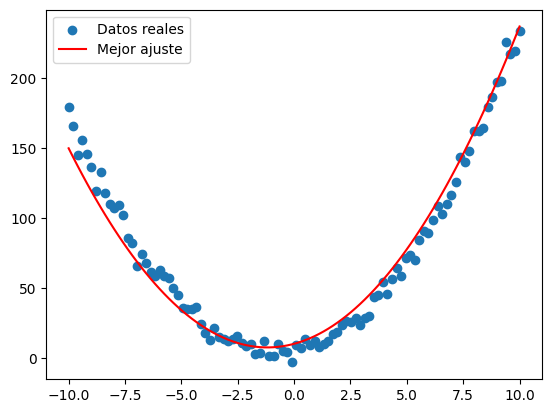

In [13]:
# Definir parámetros de funcionamiento del algoritmo genético
num_generaciones = 10
tamano_poblacion = 50
num_padres = 10
num_genes = 4
bounds = [-10.0, 10.0]
tasa_mutacion = 0.1

# Generar datos de ejemplo
x, y = generar_datos_ejemplo()

# Crear población inicial
poblacion = crear_poblacion_inicial((tamano_poblacion, num_genes), bounds)

# Algoritmo genético
for generacion in range(num_generaciones):
    evaluacion = evaluar_individuo(poblacion, x, y)
    padres = seleccion_padres(poblacion, evaluacion, num_padres)
    hijos = cruce(padres, tamano_poblacion - padres.shape[0])
    hijos = mutacion(hijos, tasa_mutacion, bounds)

    # Crear nuevas poblaciones a partir de los nuevos padres
    poblacion[0:padres.shape[0], :] = padres
    poblacion[padres.shape[0]:, :] = hijos

    # Obtener mejor resultado
    mejor_error = np.min(evaluacion)
    print(f"Mejor resultado en generación {generacion}: {mejor_error:.2f}")

# Resultados finales
mejor_idx = np.argmin(evaluacion)
mejor_coef = poblacion[mejor_idx, :]
print("--"*42)
print("Resultados finales:")
print(f"\nMejor solución:\n a={mejor_coef[0]}, b={mejor_coef[1]}, c={mejor_coef[2]}, d={mejor_coef[3]}")
print("\nValor óptimo de la función cuadrática: \n", funcion_cuadratica(x, mejor_coef))

# Graficar resultados
plt.scatter(x, y, label='Datos reales')
plt.plot(x, funcion_cuadratica(x, mejor_coef), color='red', label='Mejor ajuste')
plt.legend()
plt.show()